# Finding Heavy Traffic Indicators on I-94

This project reviews and analyzes [I-94 interstate highway](https://en.wikipedia.org/wiki/Interstate_94) traffic dataset about the west bound traffic to understand what causes traffic delays.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94 and gain a deeper understanding of what causes this delay. hese indicators can be weather type, time of the day, time of the week, etc.

## The I-94 Traffic Dataset

First, we will read the dataset and explore the first few rows to understand the data.

In [1]:
import pandas as pd

metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
metro.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

A station located approximately midway between Minneapolis and Saint Paul records the traffic data (see the [dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## Analyzing Traffic Volume

We start our analysis by exploring the distribution of the `traffic volume` column. We will use a histogram to visualize the distribution of the column.

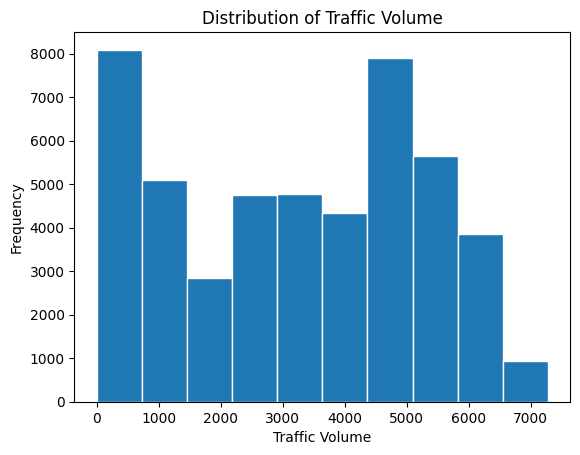

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(metro['traffic_volume'], edgecolor='white')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Traffic Volume')
plt.show() 

Next, we describe the `traffic_volume` column to understand the data better.

In [5]:
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Looking at the data, between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

It also shows that about 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction or closed. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

## Traffic Volume: Day vs. Night

In [6]:
metro['date_time'] = pd.to_datetime(metro['date_time'])

In [7]:
day = metro.copy()[(metro['date_time'].dt.hour >= 7) & (metro['date_time'].dt.hour < 19)]
night = metro.copy()[(metro['date_time'].dt.hour >= 19) | (metro['date_time'].dt.hour < 7)]

print(day.shape)
print(night.shape)

(23877, 9)
(24327, 9)


This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i_94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

## Comparing Day Vs Night Traffic Volume

Now, lets creat histograms for `day` and `nighttraffic` volume using grid charts to make it easy for comparison.

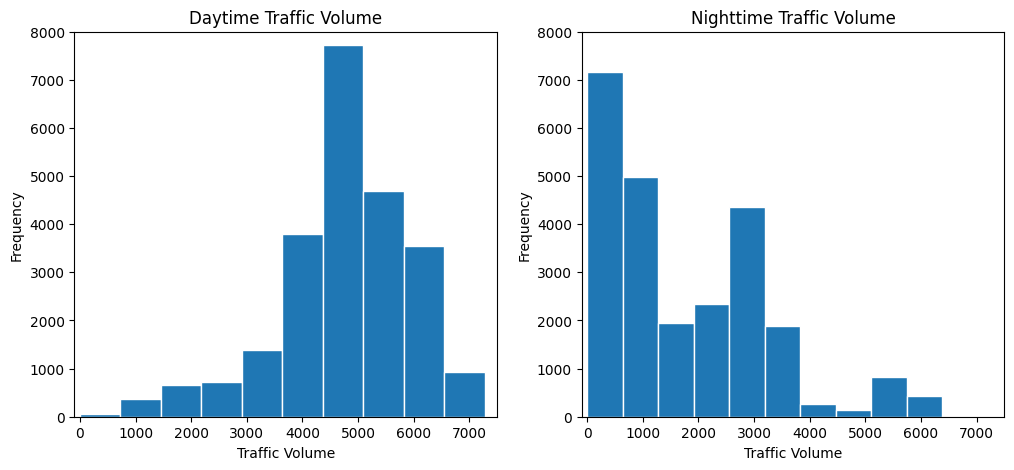

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'], edgecolor='white')
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'], edgecolor='white')
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.show()

In [9]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram distribution shows that the traffic volume is skewed to the left for  daytime and  skewed to the right for nighttime traffic. This means most of the traffic values are high during the day with 75% volume at 5559 cars and low at night with 2819 cars. The average traffic volume during the day is 4,762 cars, which is significantly higher than the average of 1,785 cars during the night. 

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changes according to:
- Month
- Day of the week
- Time of day

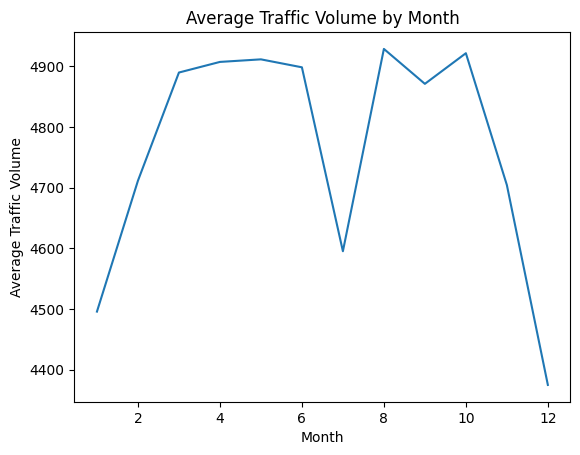

In [11]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month')['traffic_volume'].mean()
by_month.plot.line()
plt.title('Average Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

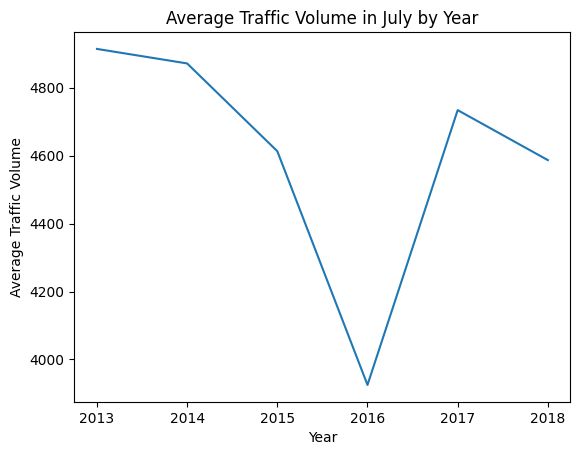

In [12]:
day['year'] = day['date_time'].dt.year
july = day[day['month'] == 7]
by_year_july = july.groupby('year')['traffic_volume'].mean()
by_year_july.plot.line()
plt.title('Average Traffic Volume in July by Year')
plt.xlabel('Year')
plt.ylabel('Average Traffic Volume')
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

## Time Indicators(II)

Let's now look at more granular time indicators: day of the week and time of the day.

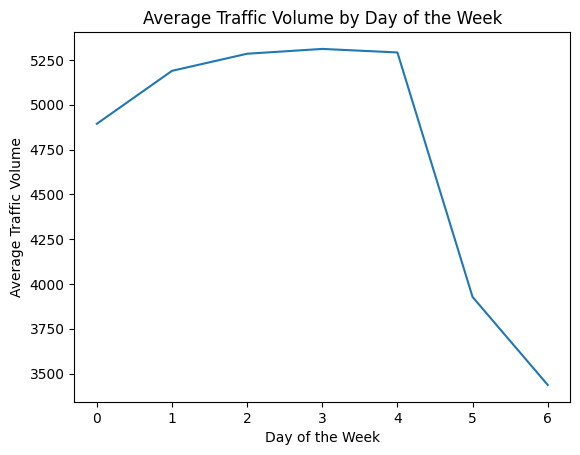

In [13]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek')['traffic_volume'].mean()
by_dayofweek.plot.line()
plt.title('Average Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

Let's now continue with the time of the day.

## Time Indicators(III)

Let's now see what values we have based on time of the day. The weekends, however, will drag down the average values, so we're going to look only at the averages separately.

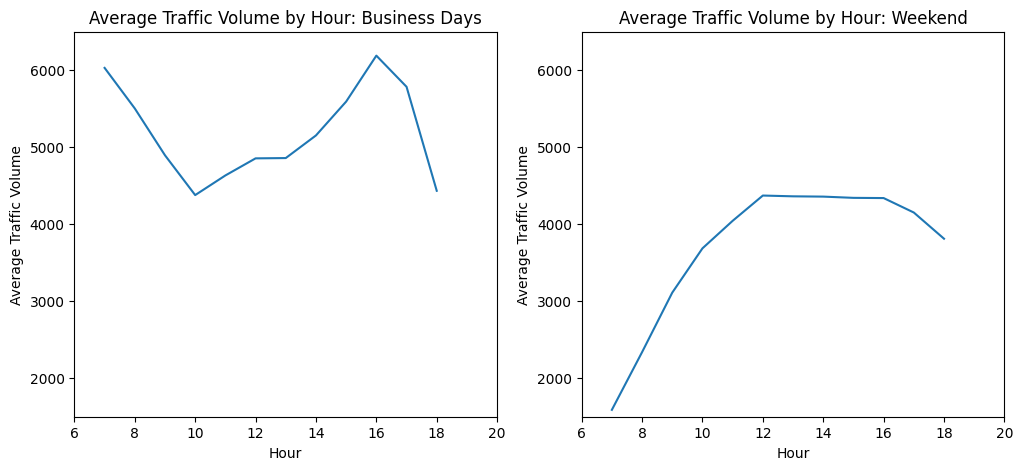

In [14]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour')['traffic_volume'].mean()
by_hour_weekend = weekend.groupby('hour')['traffic_volume'].mean()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
by_hour_business.plot.line()
plt.title('Average Traffic Volume by Hour: Business Days')
plt.xlabel('Hour')
plt.xlim(6, 20)
plt.ylabel('Average Traffic Volume')
plt.ylim(1500, 6500)


plt.subplot(1, 2, 2)
by_hour_weekend.plot.line()
plt.title('Average Traffic Volume by Hour: Weekend')
plt.xlabel('Hour')
plt.xlim(6, 20)
plt.ylabel('Average Traffic Volume')
plt.ylim(1500, 6500)

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around hours 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical, so let's start by looking up their correlation values with `traffic_volume`.

In [15]:
import numpy as np
numeric_day = day.select_dtypes(include=[np.number])
numeric_day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the highest correlation with `traffic_volume` among the numerical columns. However, the correlation value is very low (only 0.13), so we can't rely on the `temp` column to predict traffic volume. The other columns don't show any strong correlations either.

Let's generate a scatter plot to visualize the correlation between `traffic_volume` and `temp`.

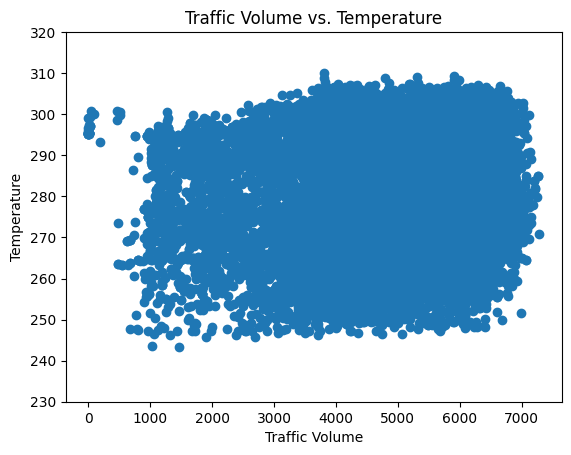

In [16]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.ylim(230, 320)
plt.title('Traffic Volume vs. Temperature')
plt.show()

We can see that the scatter plot doesn't show a clear correlation between `traffic_volume` and `temp`. This suggests that temperature doesn't seem like a solid indicator of heavy traffic.

## Weather Types

To analyze the categorical weather-related columns (`weather_main` and `weather_description`), we'll group the data by `weather main` and look at the `traffic volume` averages.

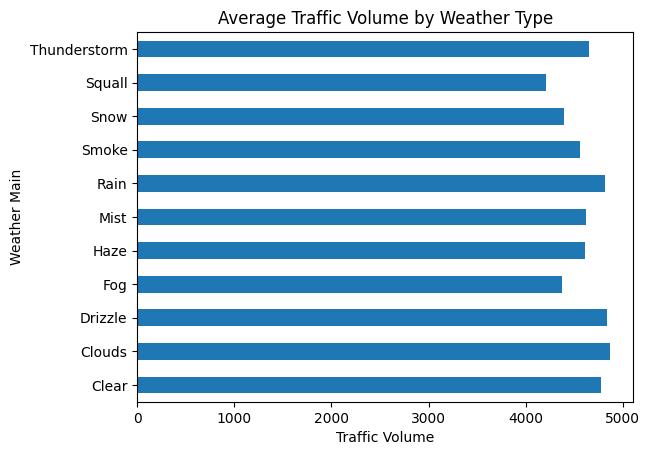

In [17]:
by_weather_main = day.groupby('weather_main')['traffic_volume'].mean()
by_weather_main.plot.barh()
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Main')
plt.title('Average Traffic Volume by Weather Type')
plt.show()  

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.

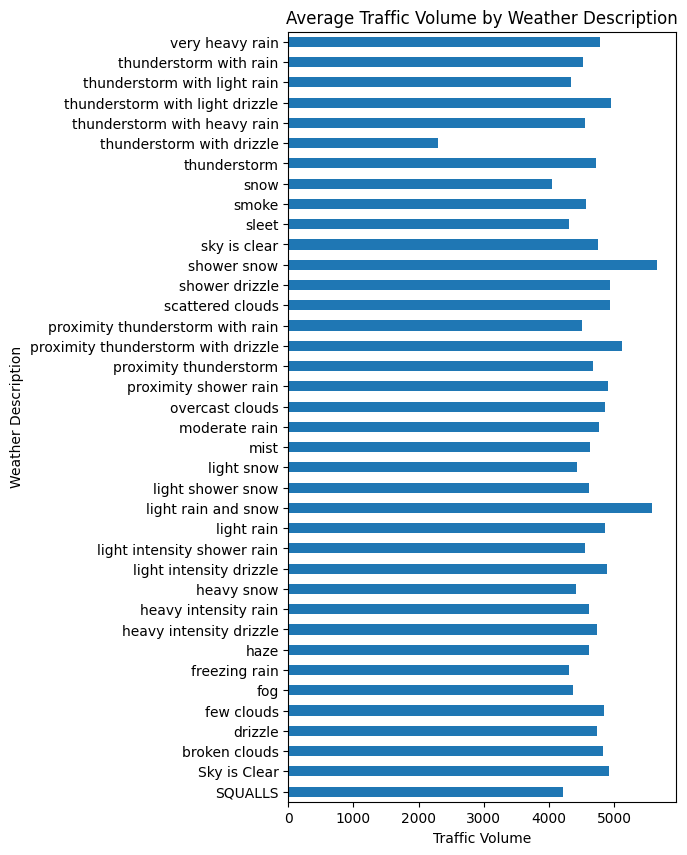

In [18]:
by_weather_description = day.groupby('weather_description')['traffic_volume'].mean()
by_weather_description.plot.barh(figsize=(5, 10))
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.title('Average Traffic Volume by Weather Description')
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000 cars:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

However, these three weather types don't really help us understand heavy traffic. We can conclude that weather doesn't seem like a solid indicator of heavy traffic.

## Conclusion

In this project, we analyzed a dataset about the I-94 Interstate highway traffic. We tried to find indicators of heavy traffic on I-94. We managed to find a few indicators:

- Time indicators:
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16. 
- Weather indicators:
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle